<a href="https://colab.research.google.com/github/yug1919/Machine-Learning-LS-2024/blob/main/Assignment_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Thu Jul 11 22:07:00 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [11]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [14]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()


In [15]:
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.2/78.2 GB disk)


In [16]:
from ultralytics import YOLO
from IPython.display import display, Image

In [50]:
%cd /content/drive/MyDrive/Colab Notebooks/Machine_Learning_LS_2024/Week_2/YOLOv8

# initially the epochs were 25 that's why trying iteration 2 with around 12-13 epochs
# !yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=25 imgsz=640 plots=True

#got worse with 12 epocs therefore going to 30 epochs
!yolo task=detect mode=train model=yolov8s.pt data= data.yaml epochs=30 imgsz=640 plots=True

# I think 30 epochs is the best or else by increasing the epochs will unnecessarily increase the time

/content/drive/MyDrive/Colab Notebooks/Machine_Learning_LS_2024/Week_2/YOLOv8
Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, 

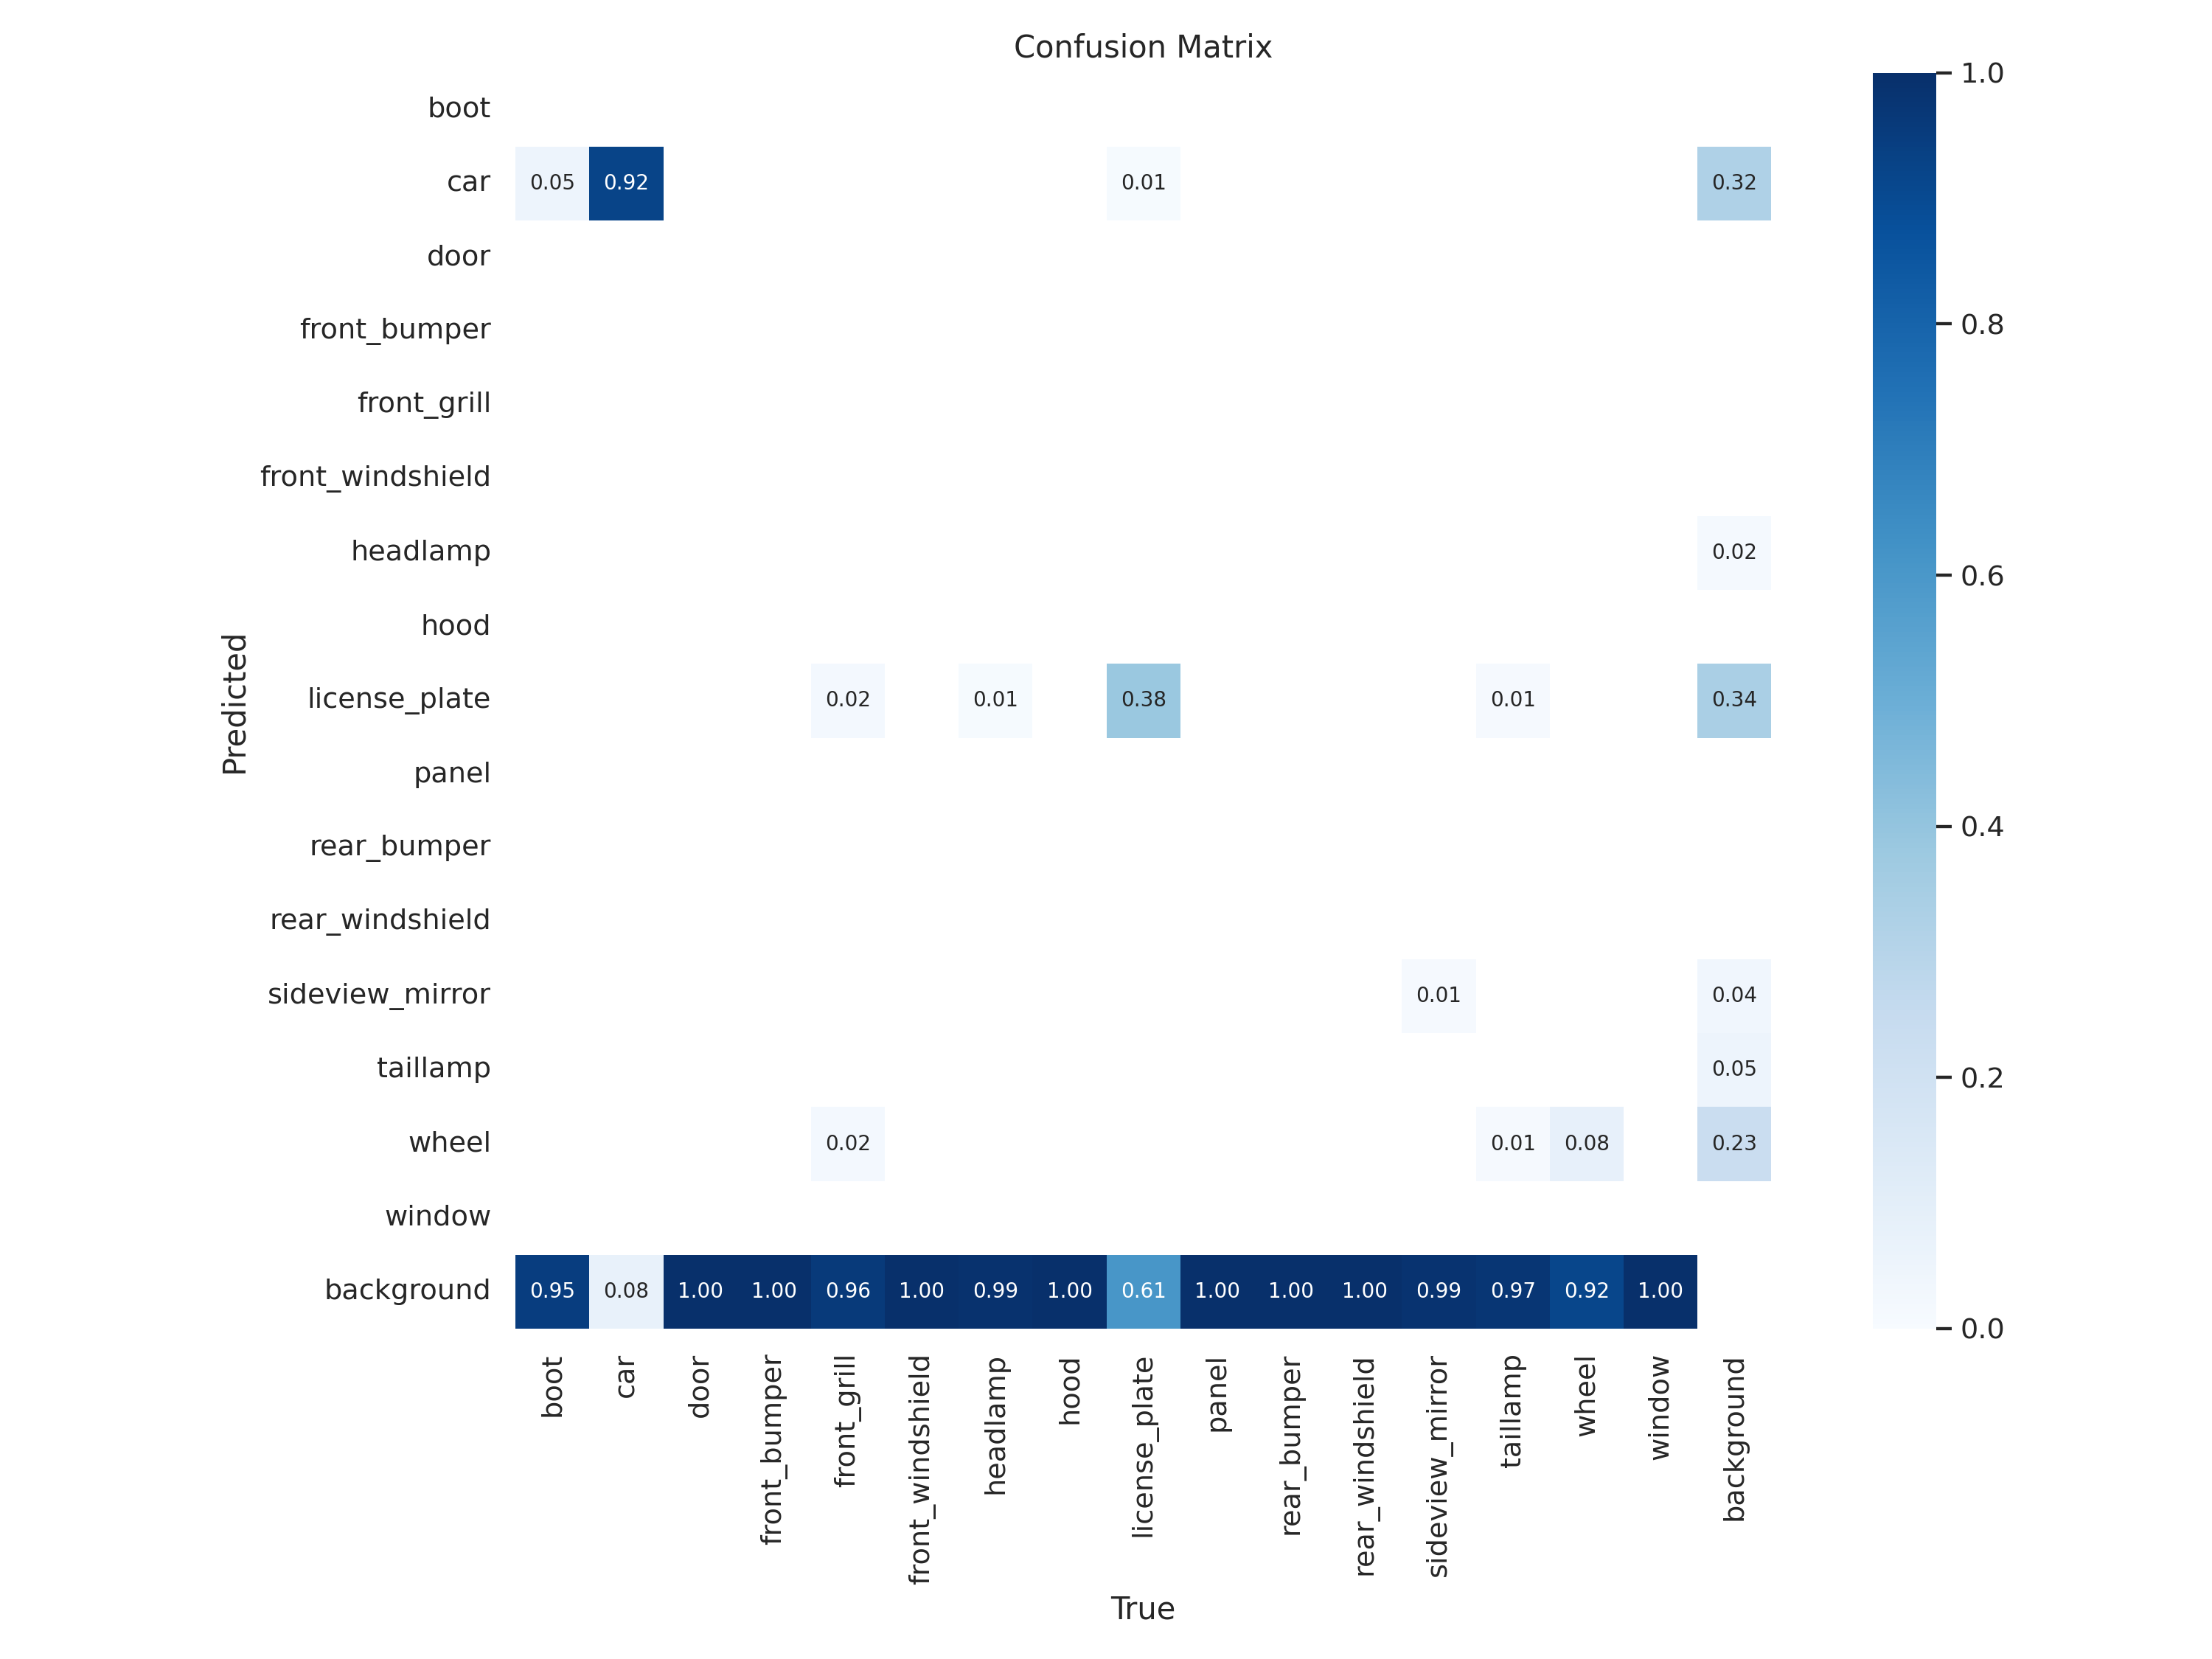

In [52]:
# Showing the confusion matrix
Image(filename='runs/detect/train5/confusion_matrix.png', width=800)

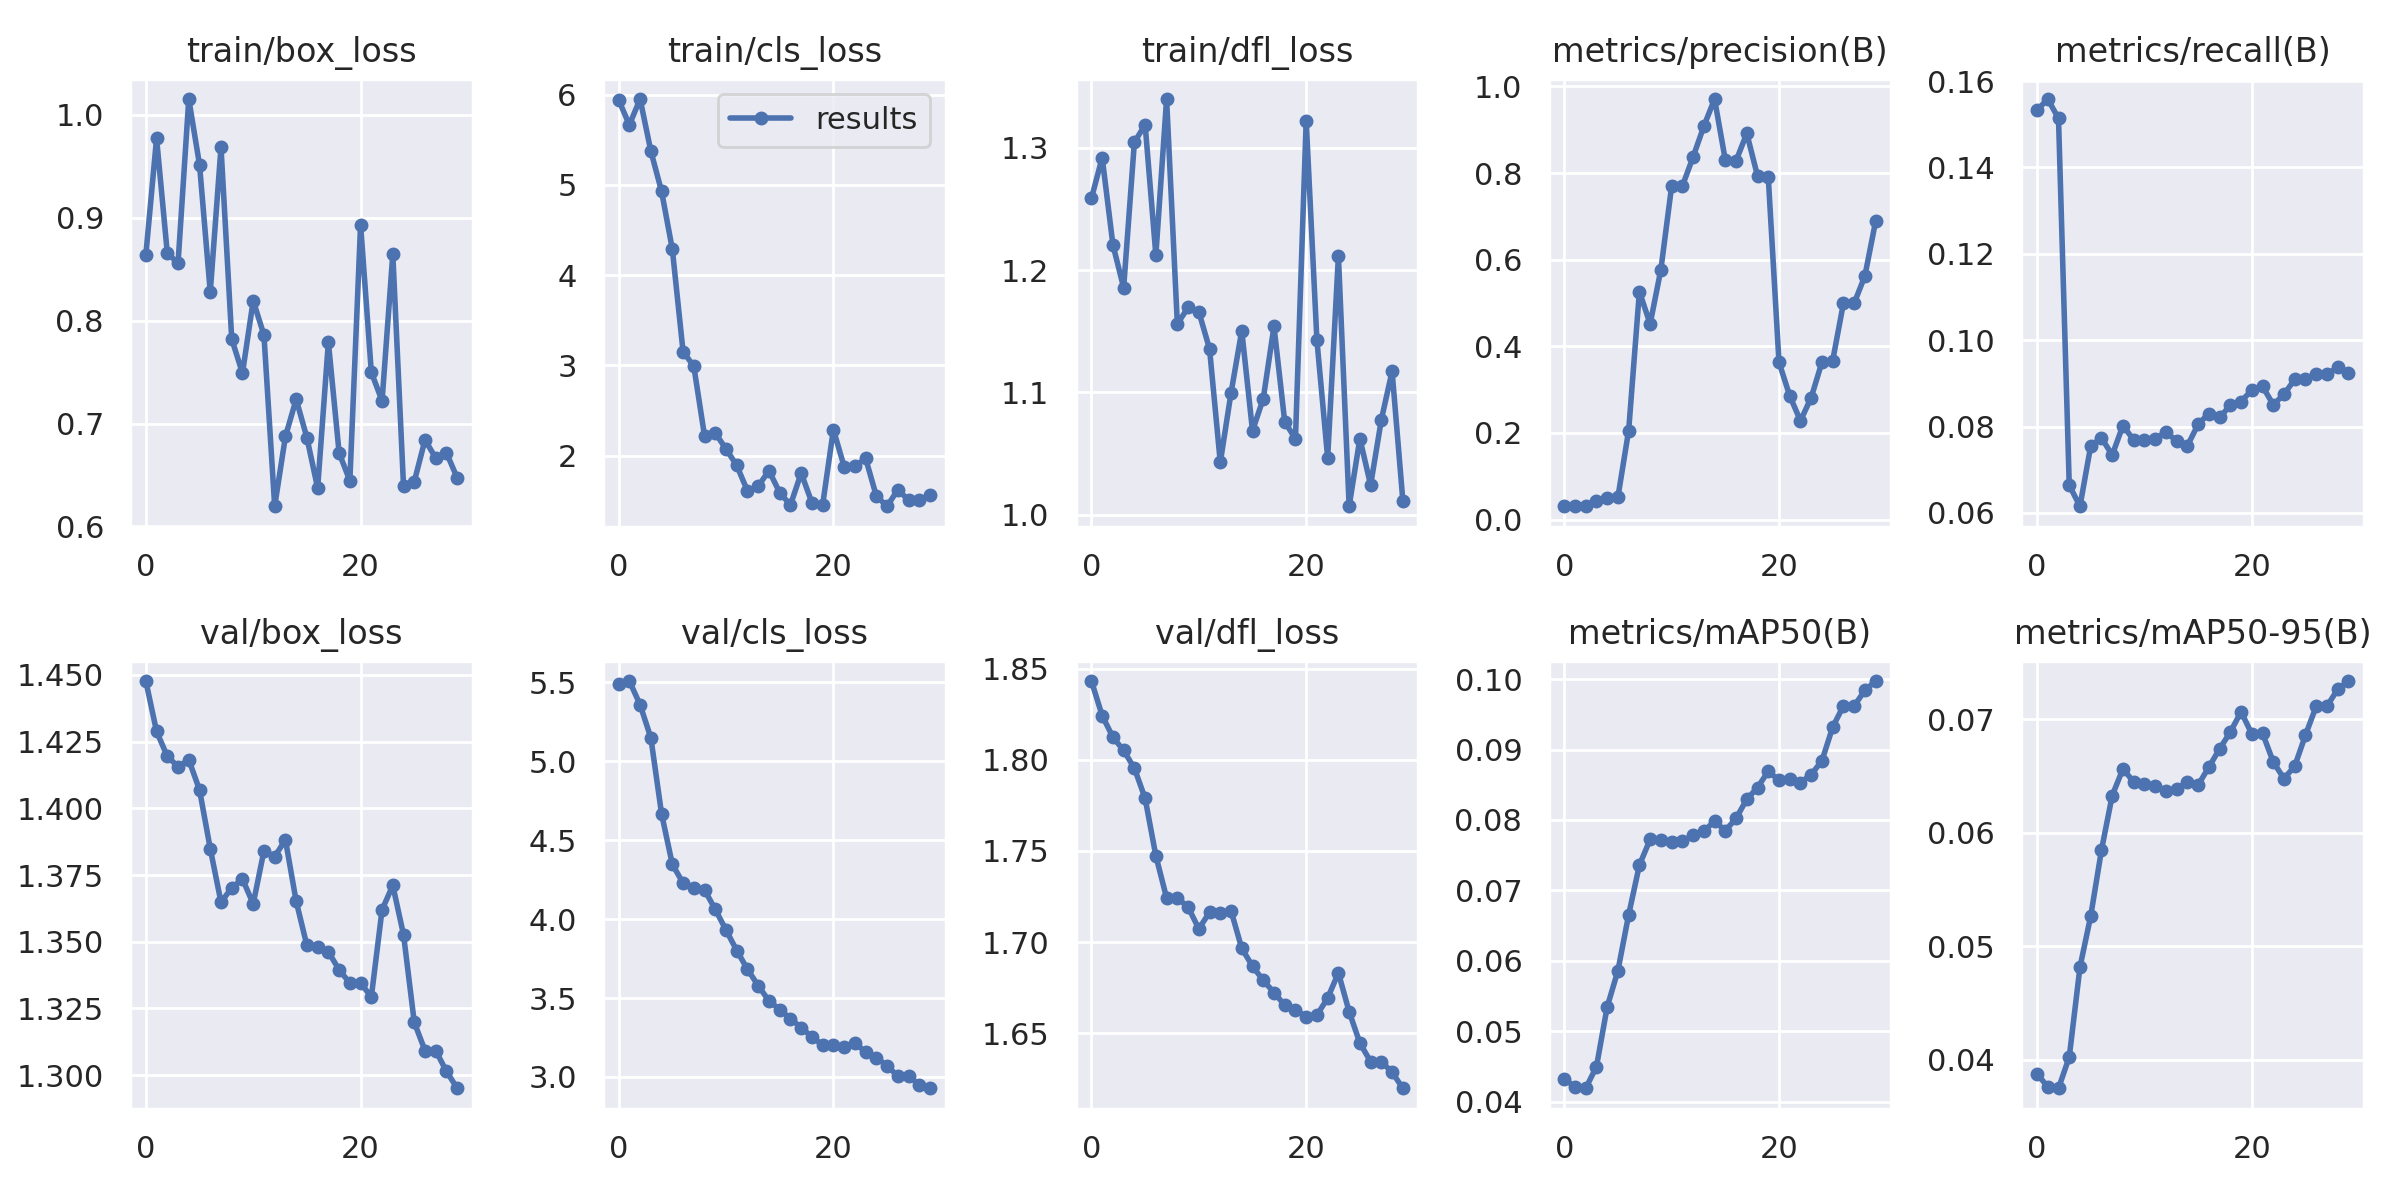

In [53]:
# Showing the results.png
Image(filename='runs/detect/train5/results.png', width=800)

In [54]:
# Validating the model on validation dataset
!yolo task=detect mode=val model=runs/detect/train5/weights/best.pt data=data.yaml

2024-07-11 23:24:43.800223: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-11 23:24:43.800277: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 23:24:43.802243: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-11 23:24:43.815746: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-11 23:24:45.811119: W tensorflow/comp

In [56]:
# Testing the model on test dataset
!yolo task=detect mode=predict model=runs/detect/train5/weights/best.pt conf=0.25 source=data/test-20240711T212329Z-001/test/images

2024-07-11 23:26:09.389375: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-11 23:26:09.389432: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-11 23:26:09.390791: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-11 23:26:09.398328: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-11 23:26:10.706072: W tensorflow/comp